In [1]:
!pip install pyxpcm

  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build cartopy


  error: subprocess-exited-with-error
  
  × Building wheel for cartopy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [279 lines of output]
      <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\_

In [1]:
from pyxpcm.models import pcm
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

In [2]:
# import the self-defined libraries
import plot_toolbox as tb
# from plot_toolbox import plot_pred_map

In [3]:
# define the path of the data and project
data_path = 'D:/VScode/MRes/scienceweb.whoi.edu/itp/data/'

In [4]:
# read the cleaned xarray from local file
import xarray as xr
ds_cleaned=xr.open_dataset(f"{data_path}/ds_cleaned.nc")

In [5]:
ds_cleaned

<xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

In [6]:
ds_cleaned.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...>

In [11]:
import pandas as pd

# Convert the 'lat' and 'lon' variables into a pandas dataframe
df_latlon = ds_cleaned[['lat', 'lon']].to_dataframe()

lat_size = 5.0
lon_size = 5.0

lon_bins = pd.cut(df_latlon['lon'], bins=np.arange(-180,185, lon_size))
lat_bins = pd.cut(df_latlon['lat'], bins=np.arange(-90,95, lat_size))

latlon_groups = df_latlon.groupby([lon_bins, lat_bins])

g_len=[]
for group_key in latlon_groups.groups:
    try:
        group = latlon_groups.get_group(group_key)
        print(f"Group {group_key}: {len(group)} rows")
        g_len.append(len(group))
    except KeyError:
        # Handle the KeyError gracefully
        print(f"No data points for group {group_key}")


Group (Interval(-180.0, -175.0, closed='right'), Interval(75.0, 80.0, closed='right')): 58 rows
Group (Interval(-180.0, -175.0, closed='right'), Interval(80.0, 85.0, closed='right')): 99 rows
Group (Interval(-180.0, -175.0, closed='right'), Interval(85.0, 90.0, closed='right')): 101 rows
Group (Interval(-175.0, -170.0, closed='right'), Interval(75.0, 80.0, closed='right')): 48 rows
Group (Interval(-175.0, -170.0, closed='right'), Interval(80.0, 85.0, closed='right')): 104 rows
Group (Interval(-175.0, -170.0, closed='right'), Interval(85.0, 90.0, closed='right')): 129 rows
Group (Interval(-170.0, -165.0, closed='right'), Interval(80.0, 85.0, closed='right')): 83 rows
Group (Interval(-170.0, -165.0, closed='right'), Interval(85.0, 90.0, closed='right')): 47 rows
Group (Interval(-165.0, -160.0, closed='right'), Interval(70.0, 75.0, closed='right')): 91 rows
Group (Interval(-165.0, -160.0, closed='right'), Interval(75.0, 80.0, closed='right')): 53 rows
Group (Interval(-165.0, -160.0, close

In [14]:
max_bin_sample_size=np.min(g_len)
max_bin_sample_size

2

In [22]:

g_len_sorted = sorted(g_len)
print(g_len_sorted[50])


68


In [18]:
print(np.mean(g_len))

313.0065359477124


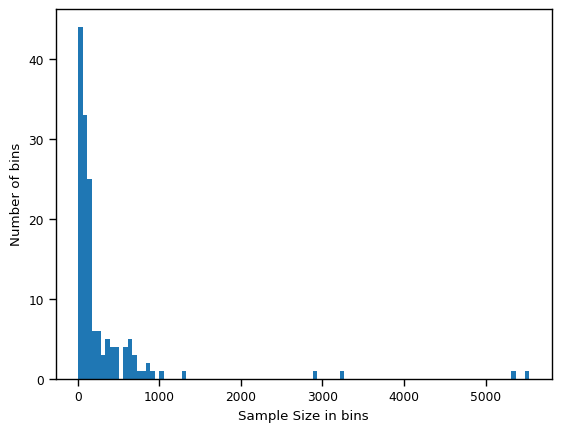

In [35]:
import matplotlib.pyplot as plt

plt.hist(g_len, bins=100)

# Add axis labels and a title
plt.xlabel("Sample Size in bins")
plt.ylabel("Number of bins")

# Show the plot
plt.show()


In [6]:
import pandas as pd

# Convert the 'lat' and 'lon' variables into a pandas dataframe
df_latlon = ds_cleaned[['lat', 'lon']].to_dataframe()

lat_size = 5.0
lon_size =5.0

lon_bins = pd.cut(df_latlon['lon'], bins=np.arange(-180,180, lon_size))
lat_bins = pd.cut(df_latlon['lat'], bins=np.arange(-90,90, lat_size))

latlon_groups = df_latlon.groupby([lon_bins, lat_bins])

for group_key in latlon_groups.groups:
    group = latlon_groups.get_group(group_key)
    print(f"Group {group_key}: {len(group)} rows")


Group (Interval(-180.0, -175.0, closed='right'), Interval(75.0, 80.0, closed='right')): 58 rows
Group (Interval(-180.0, -175.0, closed='right'), Interval(80.0, 85.0, closed='right')): 99 rows


KeyError: (Interval(-180.0, -175.0, closed='right'), nan)

In [50]:
latlon_groups.groups

{((-180.0, -175.0], (75.0, 80.0]): [9851, 9852, 9853, 9854, 9855, 9856, 9857, 9858, 9859, 9860, 9861, 9862, 9863, 9864, 9865, 9866, 9867, 9868, 9869, 9870, 9871, 9872, 9873, 9874, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899, 9905, 9906, 9907, 9908, 9911, 9912, 9913, 9914, 9915], ((-180.0, -175.0], (80.0, 85.0]): [17593, 17594, 17595, 17596, 17597, 17598, 17599, 17600, 17601, 17602, 17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611, 17612, 17613, 17614, 17615, 17616, 17617, 17618, 17619, 17620, 17621, 17622, 17623, 17624, 17625, 17626, 17627, 17628, 17629, 17630, 17631, 17632, 17633, 17634, 17635, 17636, 17637, 17638, 17639, 17651, 17828, 17829, 17830, 17831, 17832, 17833, 17834, 17835, 17836, 17837, 17838, 17839, 17840, 17841, 17842, 17843, 17844, 17845, 17846, 17847, 17848, 45589, 45590, 45591, 45592, 45593, 45594, 45595, 45596, 45597, 45598, 45599, 45600, 45601, 45602,

In [29]:
import pandas as pd

# Convert the 'lat' and 'lon' variables into a pandas dataframe
df_latlon = ds_cleaned[['lat', 'lon']].to_dataframe()

lat_size = 5.0
lon_size =5.0

lon_bins = pd.cut(df_latlon['lon'], bins=np.arange(-180,180, lon_size))
lat_bins = pd.cut(df_latlon['lat'], bins=np.arange(-90,90, lat_size))

latlon_groups = df_latlon.groupby([lon_bins, lat_bins])

group = latlon_groups.get_group((pd.Interval(-180, -175,closed='right'), pd.Interval(75, 80,closed='right')))
len(group.index)


In [35]:
df_latlon

,lat,lon,profiler,date
nprof,,,,
0,80.0378,-149.1544,100,2017-09-20 00:02:04.416000
1,80.0992,-148.7704,100,2017-09-21 00:02:02.688000
2,80.1768,-147.9601,100,2017-09-22 00:02:02.688000
3,80.2801,-145.6491,100,2017-09-24 00:02:02.688000
4,80.3072,-145.0618,100,2017-09-25 00:02:02.688000
...,...,...,...,...
47885,82.6869,-97.2736,9,2008-12-05 00:24:14.976000
47886,82.6647,-97.3694,9,2008-12-05 07:12:00.864000
47887,82.6484,-97.4092,9,2008-12-05 12:00:05.183999


In [31]:

unique_groups = latlon_groups.groups.keys()
print(unique_groups)


dict_keys([(Interval(-180.0, -175.0, closed='right'), Interval(75.0, 80.0, closed='right')), (Interval(-180.0, -175.0, closed='right'), Interval(80.0, 85.0, closed='right')), (Interval(-180.0, -175.0, closed='right'), nan), (Interval(-175.0, -170.0, closed='right'), Interval(75.0, 80.0, closed='right')), (Interval(-175.0, -170.0, closed='right'), Interval(80.0, 85.0, closed='right')), (Interval(-175.0, -170.0, closed='right'), nan), (Interval(-170.0, -165.0, closed='right'), Interval(80.0, 85.0, closed='right')), (Interval(-170.0, -165.0, closed='right'), nan), (Interval(-165.0, -160.0, closed='right'), Interval(70.0, 75.0, closed='right')), (Interval(-165.0, -160.0, closed='right'), Interval(75.0, 80.0, closed='right')), (Interval(-165.0, -160.0, closed='right'), Interval(80.0, 85.0, closed='right')), (Interval(-165.0, -160.0, closed='right'), nan), (Interval(-160.0, -155.0, closed='right'), Interval(70.0, 75.0, closed='right')), (Interval(-160.0, -155.0, closed='right'), Interval(75.

In [33]:
group = latlon_groups.get_group((pd.Interval(-180, -175,closed='right'), pd.Interval(75, 80,closed='right')))



In [46]:
group.index.values


array([9851, 9852, 9853, 9854, 9855, 9856, 9857, 9858, 9859, 9860, 9861,
       9862, 9863, 9864, 9865, 9866, 9867, 9868, 9869, 9870, 9871, 9872,
       9873, 9874, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 9882, 9883,
       9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894,
       9895, 9896, 9897, 9898, 9899, 9905, 9906, 9907, 9908, 9911, 9912,
       9913, 9914, 9915], dtype=int64)

In [48]:
len(group.index)

58

In [52]:
# Patitioning the data into training and testing dataset
def data_partioning(ds_cleaned, ratio=0.8):
    size=int(ds_cleaned.nprof.size*ratio)
    indices = np.random.choice(ds_cleaned.nprof, size=size, replace=False)
    ds_train = ds_cleaned.isel(nprof=indices)

    indices = np.setdiff1d(ds_cleaned.nprof, ds_train.nprof)
    ds_test = ds_cleaned.isel(nprof=indices)

    return ds_train, ds_test
# ratio=0.8 # The ratio of training dataset

# size=int(ds_cleaned.nprof.size*ratio)
# indices = np.random.choice(ds_cleaned.nprof, size=size, replace=False)
# ds_train = ds_cleaned.isel(nprof=indices)

# indices = np.setdiff1d(ds_cleaned.nprof, ds_train.nprof)
# ds_test = ds_cleaned.isel(nprof=indices)

In [ ]:
pstart=np.max(ds_train.pressure)
pend=np.min(ds_train.pressure)
z = np.arange(pstart,pend,-10.)
pcm_features = {'temperature': z, 'salinity':z}
m = pcm(K=3, features=pcm_features,maxvar=3)
features_in_ds = {'temperature': 'temperature', 'salinity': 'salinity'}
m.fit(ds_train,features=features_in_ds,dim='pressure')

In [17]:
ds_train

<xarray.Dataset>
Dimensions:      (nprof: 38312, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

In [18]:
ds_test

<xarray.Dataset>
Dimensions:      (nprof: 9578, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

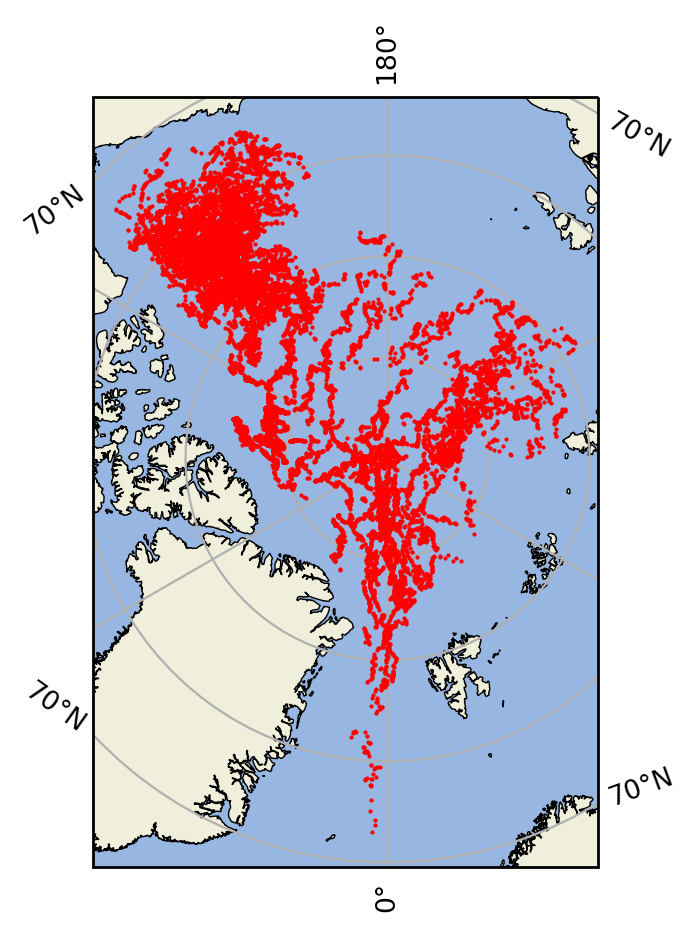

In [9]:
tb.plot_data_location(ds_train)

In [19]:
pstart=np.max(ds_train.pressure)
pend=np.min(ds_train.pressure)
z = np.arange(pstart,pend,-10.)
pcm_features = {'temperature': z, 'salinity':z}
m = pcm(K=3, features=pcm_features,maxvar=3)
m

<pcm 'gmm' (K: 3, F: 2)>
Number of class: 3
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

In [20]:
features_in_ds = {'temperature': 'temperature', 'salinity': 'salinity'}
m.fit(ds_train,features=features_in_ds,dim='pressure')

<pcm 'gmm' (K: 3, F: 2)>
Number of class: 3
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: -1.176652

In [21]:
ds_test=m.predict(ds_test,features=features_in_ds,dim='pressure',inplace=True)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [22]:
ds_test

<xarray.Dataset>
Dimensions:      (nprof: 9578, pressure: 99)
Coordinates:
    profiler     (nprof) int32 78 78 78 78 78 78 78 78 78 ... 9 9 9 9 9 9 9 9 9
    date         (nprof) datetime64[ns] 2014-04-09T21:02:06.144000 ... 2009-0...
    lon          (nprof) float64 -137.1 -137.2 -137.3 ... -97.41 -95.51 -95.29
    lat          (nprof) float64 74.29 74.29 74.35 74.35 ... 82.65 82.75 82.76
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
  * nprof        (nprof) int64 0 1 2 3 4 5 6 ... 9572 9573 9574 9575 9576 9577
Data variables:
    temperature  (nprof, pressure) float64 -1.567 -1.566 -1.566 ... 0.422 0.4203
    salinity     (nprof, pressure) float64 28.88 28.88 28.88 ... 34.84 34.84
    PCM_LABELS   (nprof) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1

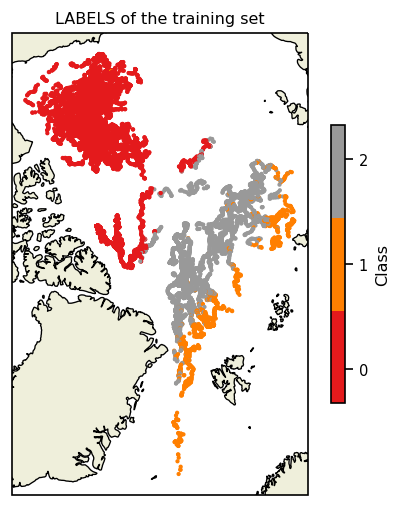

In [14]:
tb.plot_pred_map(ds_test,m)

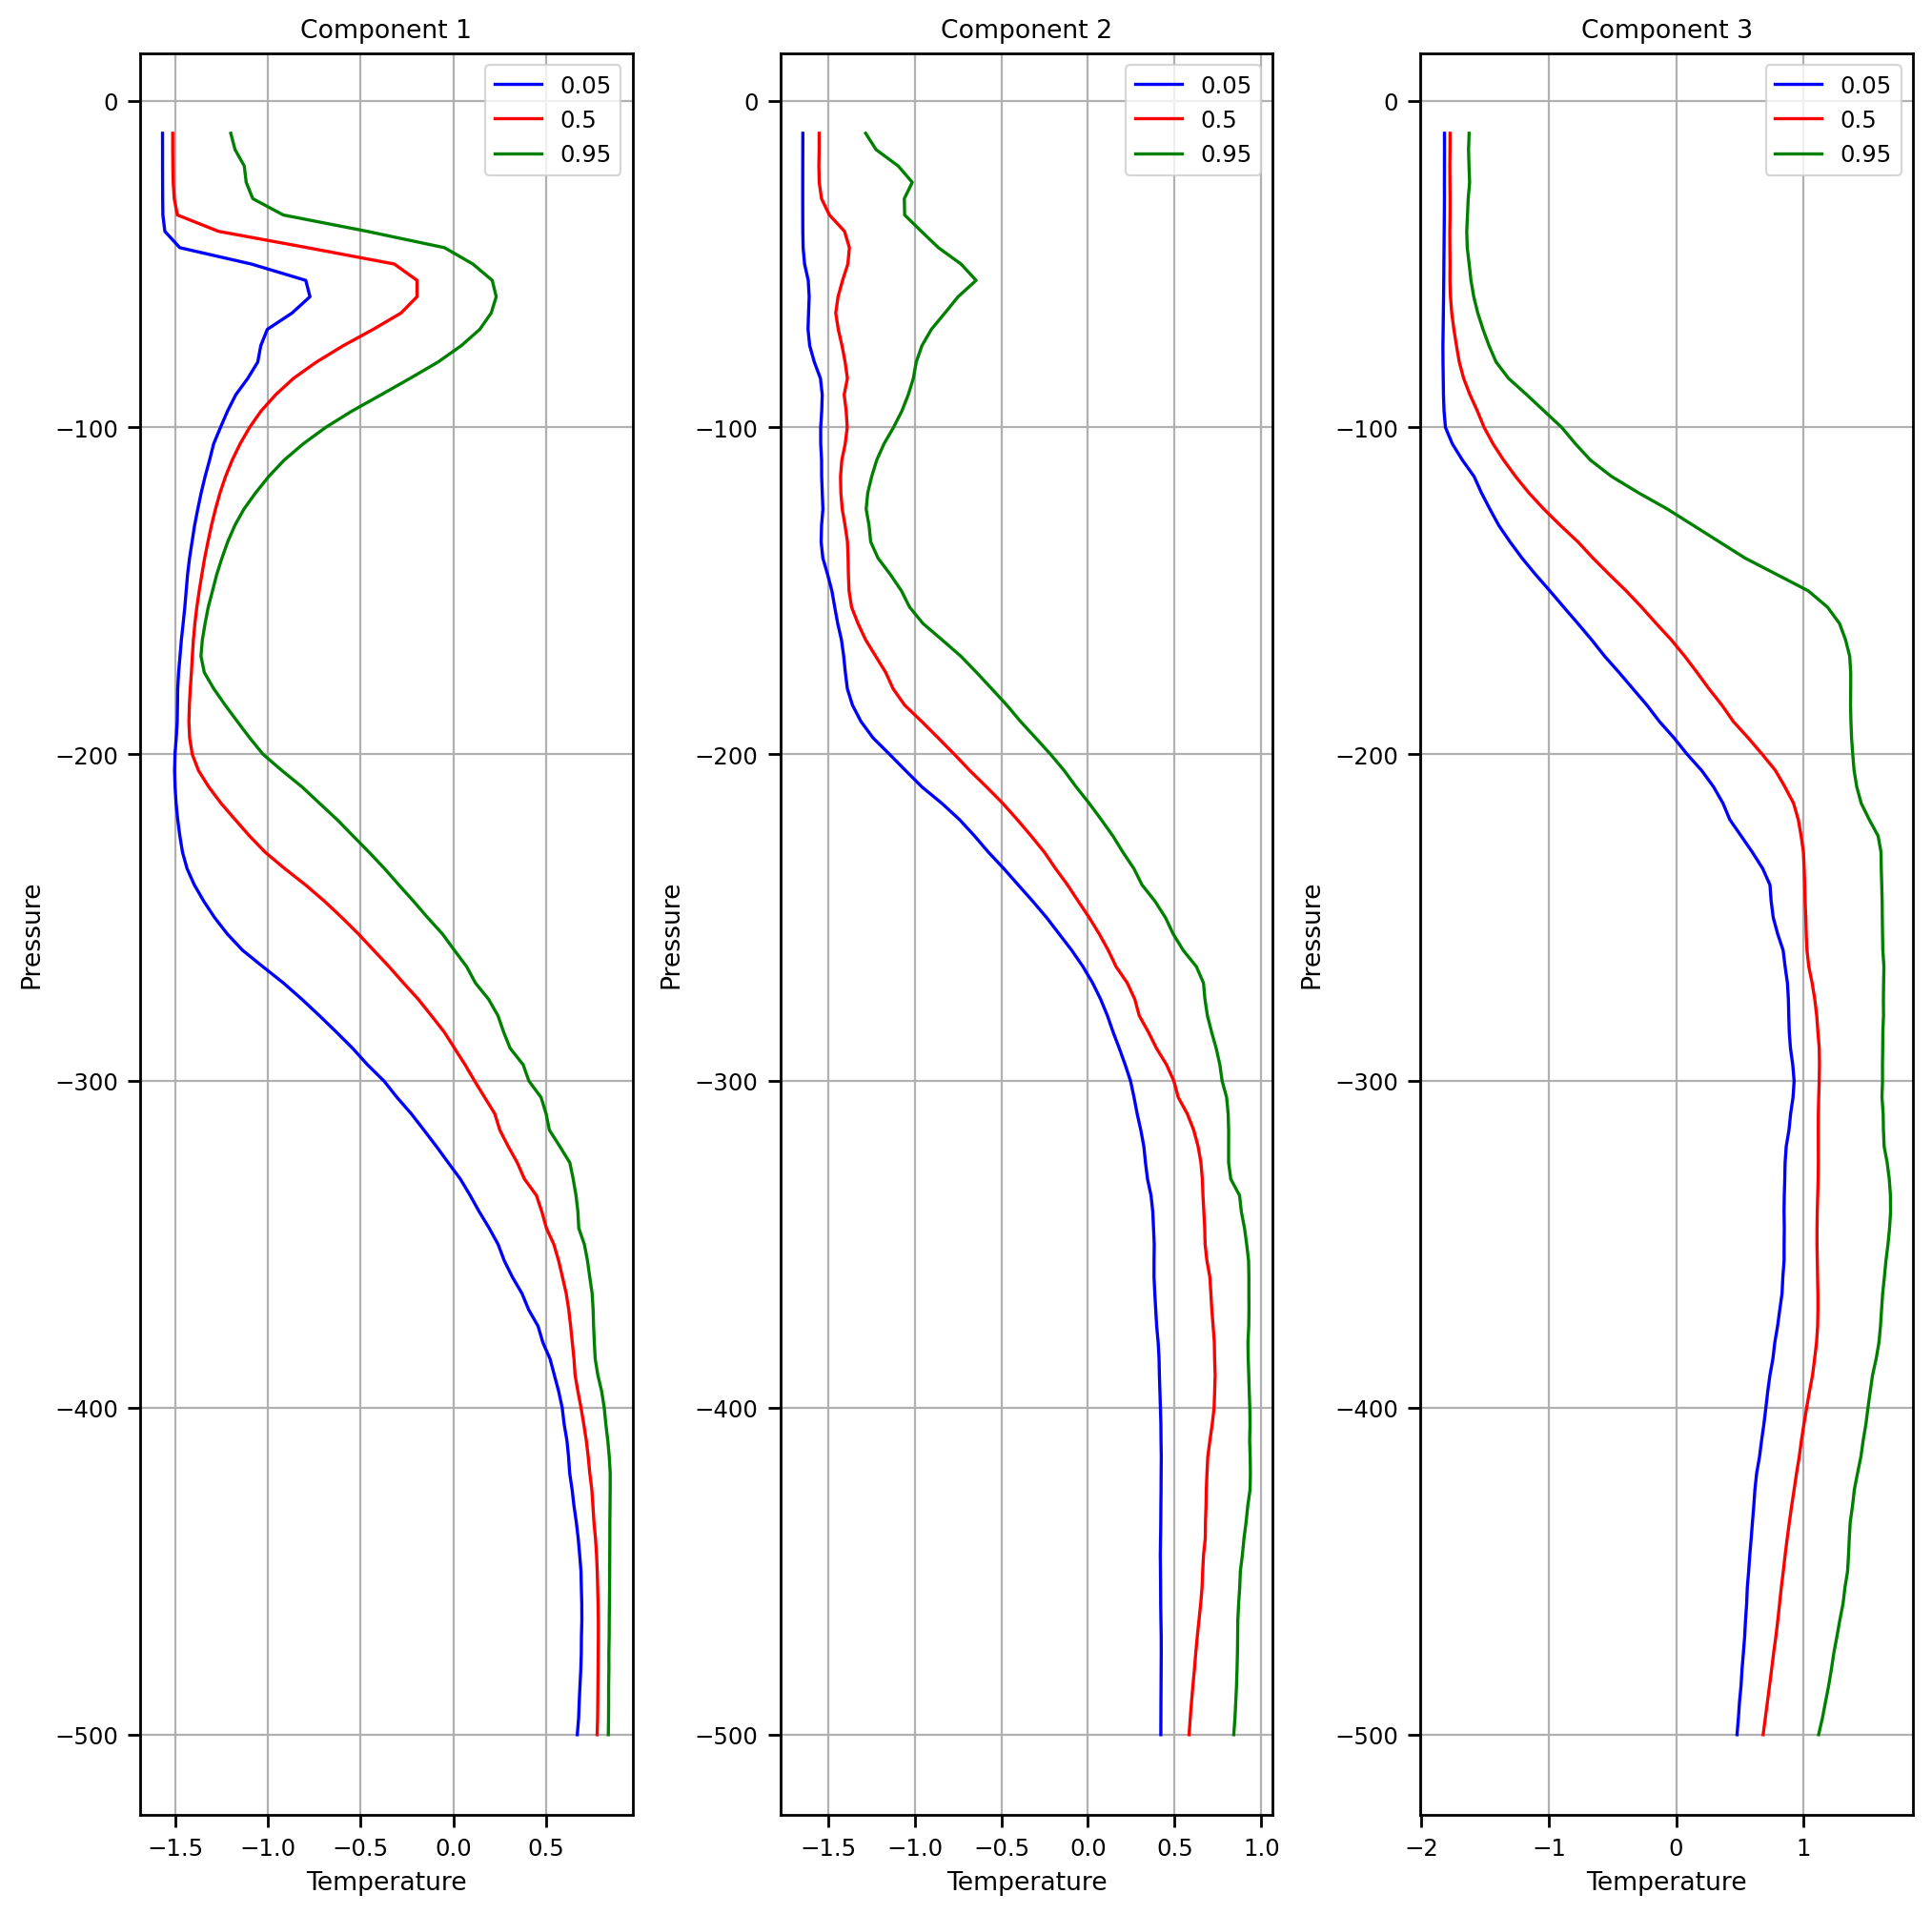

In [23]:
# Calculate the quantile and plot it
for vname in ['temperature', 'salinity']:
    ds_test = ds_test.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)    

ds_group = ds_test.groupby('PCM_LABELS')
tb.plot_quantile(ds_group)